In [154]:
# Librarires
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [155]:
import pandas as pd
df = pd.read_csv("/content/diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [156]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [157]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [158]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [159]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

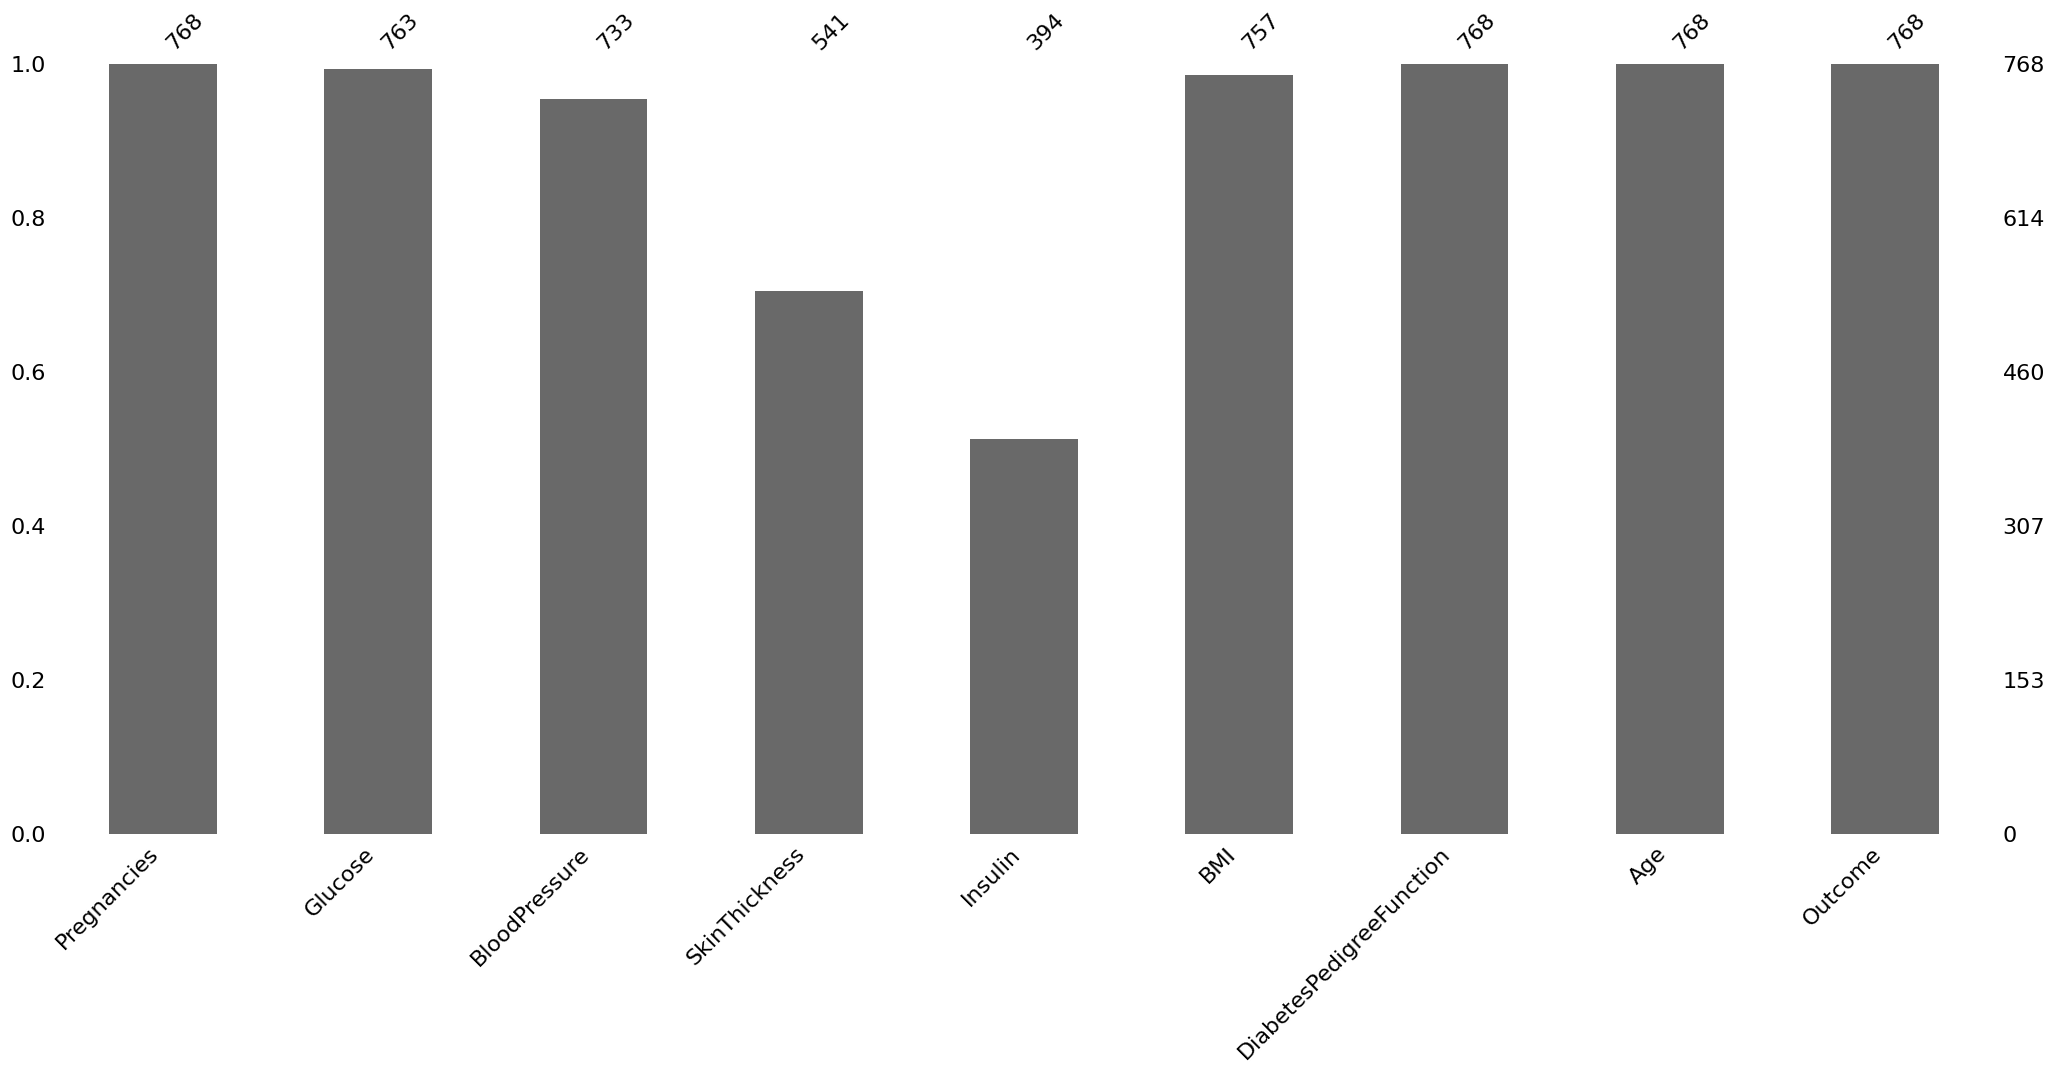

In [160]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting
import missingno as msno
msno.bar(df);

In [161]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [162]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [163]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [164]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [165]:
#Modeling
response = ["Outcome"]
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [166]:
X = df.drop("Outcome",axis=1)
Y = df['Outcome']

In [167]:
X=df.iloc[:,0:8]
Y=df.iloc[:,8:9]
print(X,'\n',Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    169.5  33.6   
1              1     85.0           66.0           29.0    102.5  26.6   
2              8    183.0           64.0           32.0    169.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    102.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    169.5  30.1   
767            1     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


In [170]:
# Logistic Regression Implementation
# Instantiate Logistic  Regression
lr = LogisticRegression()
#Fit on train data
lr.fit(X_train,Y_train)
#Predict on train data
lr.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7833876221498371

In [171]:
#LR
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
Y_pred = lr.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
lr=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",lr)
print(f"Accuracy: {lr * 100:.2f}%")

Precision: 0.6857142857142857
Recall: 0.5333333333333333
F1-score: 0.6
Accuracy: 0.7162079510703363
Accuracy: 71.62%


In [172]:
# Linear Support Vector Classifier
from sklearn.svm import LinearSVC
# Instantiate Logistic  Regression
lsvc = LinearSVC()
#Fit on train data
lsvc.fit(X_train,Y_train)
#Predict on train data
lsvc.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6710097719869706

In [173]:
#SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = lsvc.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
lsvc=roc_auc_score(Y_test, Y_pred)
print("accuracy:",lsvc)
print(f"accuracy %: {lsvc * 100:.2f}%")

Precision: 0.6666666666666666
Recall: 0.13333333333333333
F1-score: 0.2222222222222222
accuracy: 0.5529051987767584
accuracy %: 55.29%


In [174]:
# Decision TRee Classifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate DecisionTreeClassifier
dtc = DecisionTreeClassifier()
#Fit on train data
dtc.fit(X_train,Y_train)
#Predict on train data
dtc.score(X_train, Y_train)

1.0

In [175]:
#Confussion Matrix DTC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = dtc.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
dtc=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",dtc)
print(f"Accuracy: {dtc * 100:.2f}%")

Precision: 0.7659574468085106
Recall: 0.8
F1-score: 0.7826086956521738
Accuracy: 0.8495412844036697
Accuracy: 84.95%


In [176]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate RandomForestClassifier
rfc = RandomForestClassifier()
#Fit on train data
rfc.fit(X_train,Y_train)
#Predict on train data
rfc.score(X_train, Y_train)

<ipython-input-176-883d6820e81d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,Y_train)


1.0

In [177]:
#Confussion Matrix RFC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = rfc.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
rfc=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",rfc)
print(f"Accuracy: {rfc * 100:.2f}%")

Precision: 0.8095238095238095
Recall: 0.7555555555555555
F1-score: 0.7816091954022989
Accuracy: 0.8410805300713557
Accuracy: 84.11%


In [178]:
# Neural Netwrok Classifier
from sklearn.neural_network import MLPClassifier
# Instantiate RandomForestClassifier
nnc = MLPClassifier()
#Fit on train data
nnc.fit(X_train,Y_train)
#Predict on train data
nnc.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8322475570032574

In [179]:
#Confussion Matrix NNC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = nnc.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
nnc=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",nnc)
print(f"Accuracy: {nnc * 100:.2f}%")

Precision: 0.5818181818181818
Recall: 0.7111111111111111
F1-score: 0.64
Accuracy: 0.7500509683995923
Accuracy: 75.01%


In [180]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
# Instantiate RandomForestClassifier
nbc = GaussianNB()
#Fit on train data
nbc.fit(X_train,Y_train)
#Predict on train data
nbc.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7736156351791531

In [181]:
#Confussion Matrix NBC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = nbc.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
nbc=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",nbc)
print(f"Accuracy: {nbc * 100:.2f}%")

Precision: 0.5652173913043478
Recall: 0.5777777777777777
F1-score: 0.5714285714285713
Accuracy: 0.6971457696228338
Accuracy: 69.71%


In [182]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Instantiate RandomForestClassifier
knn = KNeighborsClassifier()
#Fit on train data
knn.fit(X_train,Y_train)
#Predict on train data
knn.score(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8876221498371335

In [183]:
#Confussion Matrix knn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Y_pred = knn.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
knn=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",knn)
print(f"Accuracy: {knn * 100:.2f}%")

Precision: 0.7804878048780488
Recall: 0.7111111111111111
F1-score: 0.7441860465116279
Accuracy: 0.8142711518858309
Accuracy: 81.43%


In [184]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
xgb=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",xgb)
print(f"Accuracy: {xgb * 100:.2f}%")

Precision: 0.813953488372093
Recall: 0.7777777777777778
F1-score: 0.7954545454545455
Accuracy: 0.8521916411824668
Accuracy: 85.22%


In [185]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
f1 = f1_score(Y_test, Y_pred)
print("F1-score:", f1)
abc=roc_auc_score(Y_test, Y_pred)
print("Accuracy:",abc)
print(f"Accuracy: {abc * 100:.2f}%")

Precision: 0.7619047619047619
Recall: 0.7111111111111111
F1-score: 0.735632183908046
Accuracy: 0.8096839959225282
Accuracy: 80.97%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


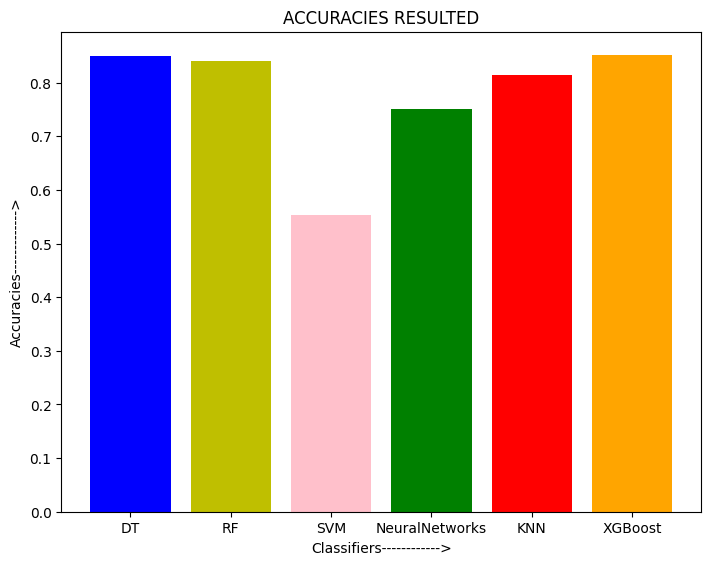

In [186]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['DT','RF','SVM','NeuralNetworks','KNN','XGBoost','AdaBoost']

accuracy = [dtc,rfc,lsvc,nnc,knn,xgb,abc]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')


ax.bar(algo[3],accuracy[3],color = 'green')

ax.bar(algo[4],accuracy[4],color = 'r')

ax.bar(algo[5],accuracy[5],color = 'orange')

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()

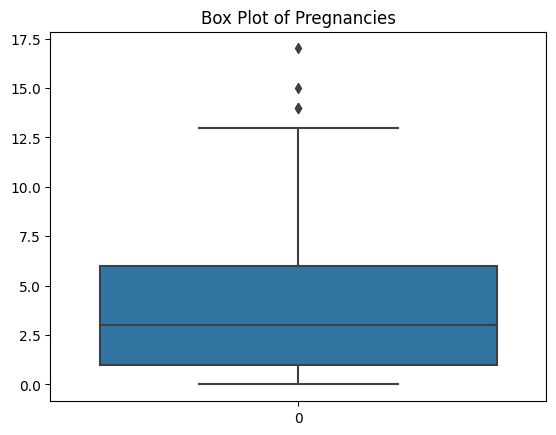

In [187]:
def Box(df):
    plt.title("Box Plot of Pregnancies")
    sns.boxplot(df)
    plt.show()
Box(df['Pregnancies'])

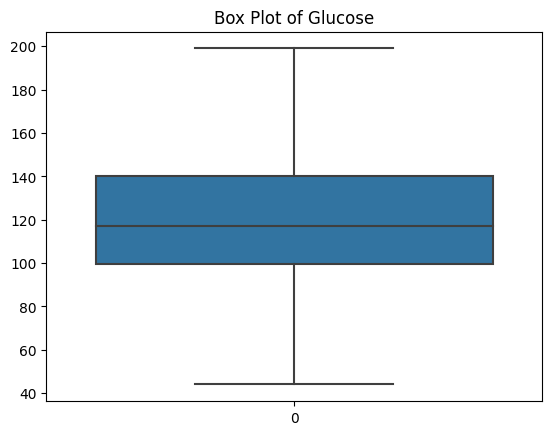

In [188]:
def Box(df):
    plt.title("Box Plot of Glucose")
    sns.boxplot(df)
    plt.show()
Box(df['Glucose'])

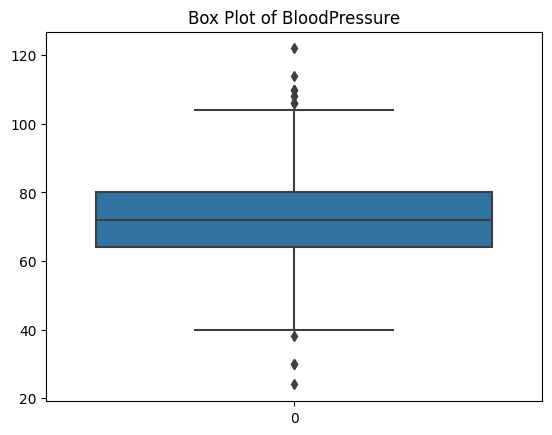

In [189]:
def Box(df):
    plt.title("Box Plot of BloodPressure")
    sns.boxplot(df)
    plt.show()
Box(df['BloodPressure'])

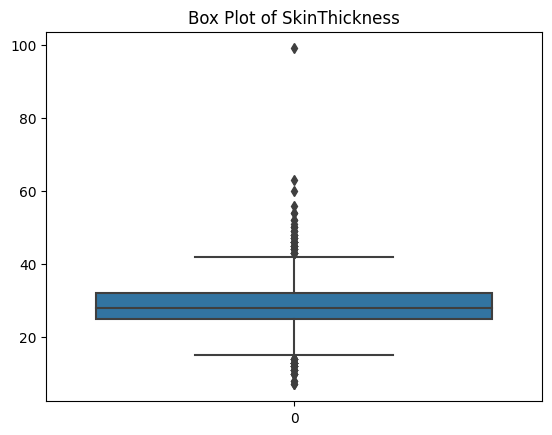

In [190]:
def Box(df):
    plt.title("Box Plot of SkinThickness")
    sns.boxplot(df)
    plt.show()
Box(df['SkinThickness'])

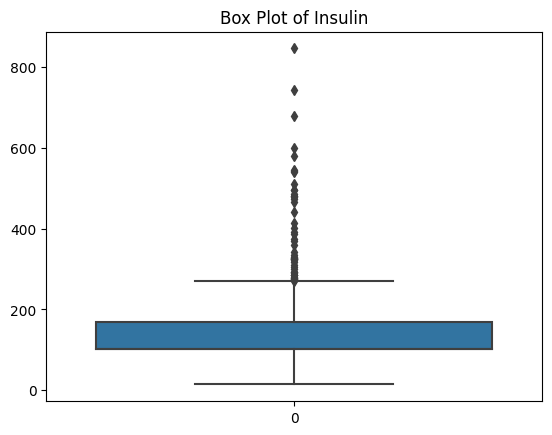

In [191]:
def Box(df):
    plt.title("Box Plot of Insulin")
    sns.boxplot(df)
    plt.show()
Box(df['Insulin'])

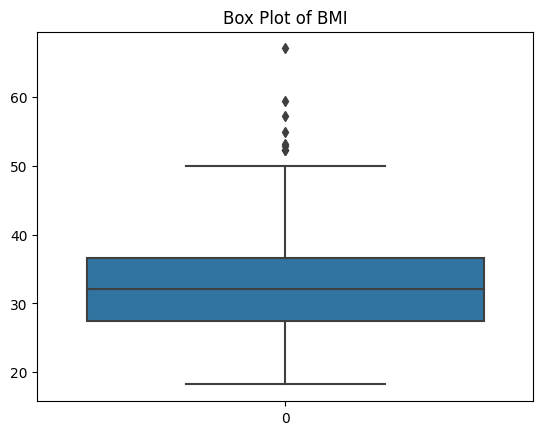

In [192]:
def Box(df):
    plt.title("Box Plot of BMI")
    sns.boxplot(df)
    plt.show()
Box(df['BMI'])

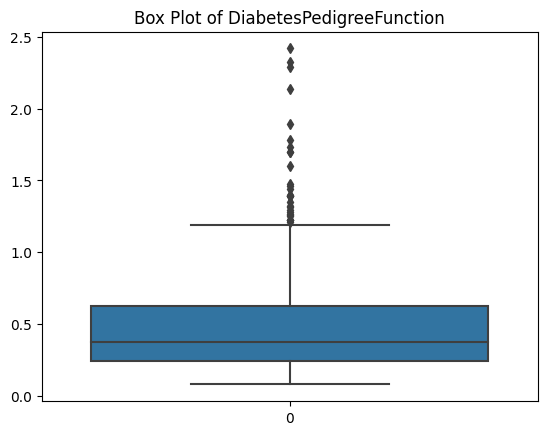

In [193]:
def Box(df):
    plt.title("Box Plot of DiabetesPedigreeFunction")
    sns.boxplot(df)
    plt.show()
Box(df['DiabetesPedigreeFunction'])

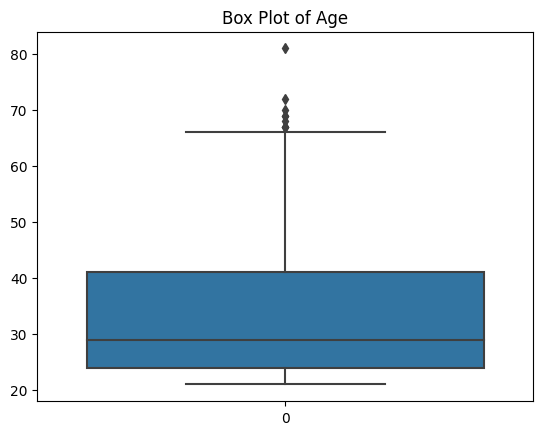

In [194]:
def Box(df):
    plt.title("Box Plot of Age")
    sns.boxplot(df)
    plt.show()
Box(df['Age'])

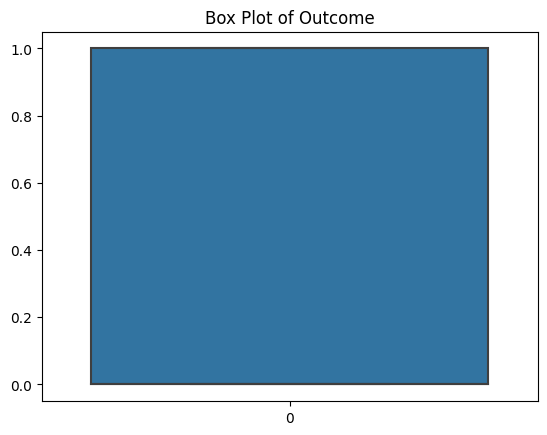

In [195]:
def Box(df):
    plt.title("Box Plot of Outcome")
    sns.boxplot(df)
    plt.show()
Box(df['Outcome'])

<Axes: xlabel='Pregnancies', ylabel='Count'>

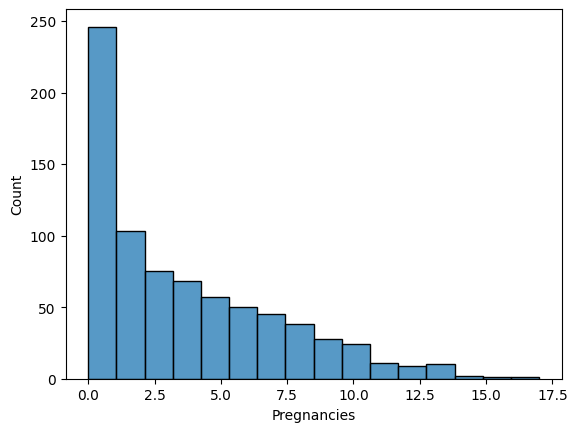

In [196]:
sns.histplot(x = "Pregnancies", data=df)

<Axes: xlabel='Glucose', ylabel='Count'>

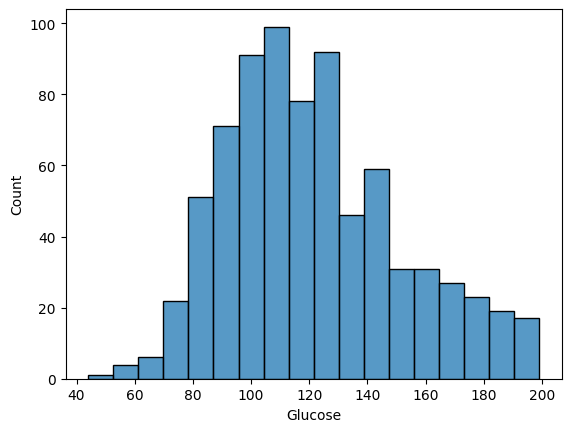

In [197]:
sns.histplot(x = "Glucose", data=df)

<Axes: xlabel='BloodPressure', ylabel='Count'>

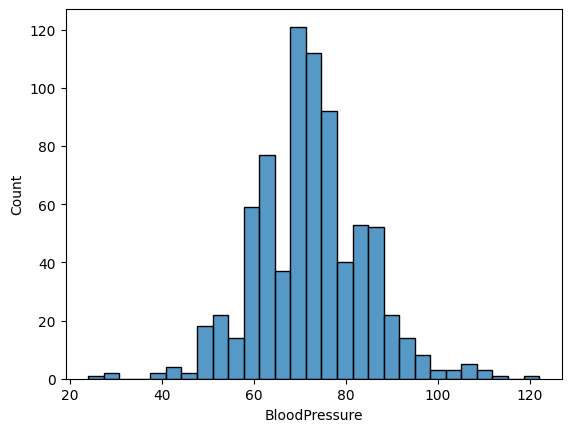

In [198]:
sns.histplot(x = "BloodPressure", data=df)

<Axes: xlabel='SkinThickness', ylabel='Count'>

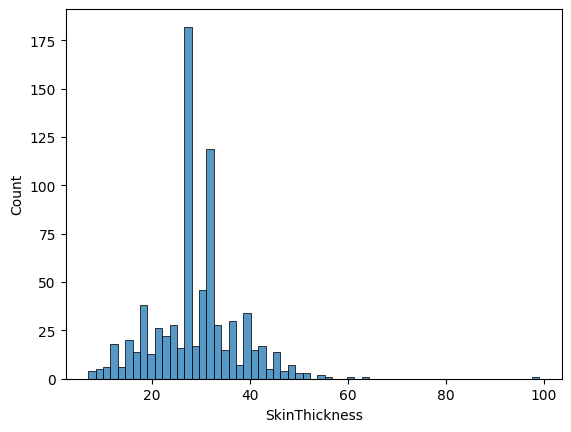

In [199]:
sns.histplot(x = "SkinThickness", data=df)

<Axes: xlabel='Insulin', ylabel='Count'>

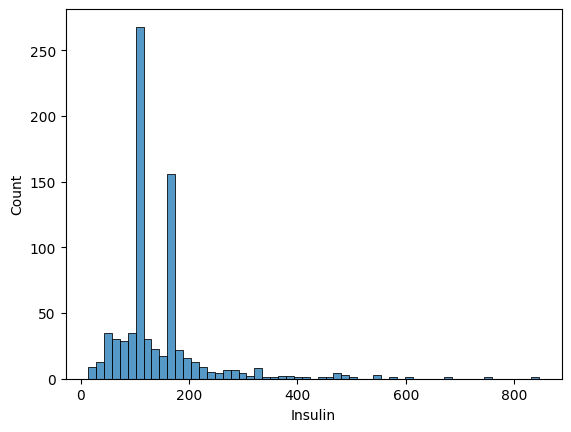

In [200]:
sns.histplot(x = "Insulin", data=df)

<Axes: xlabel='BMI', ylabel='Count'>

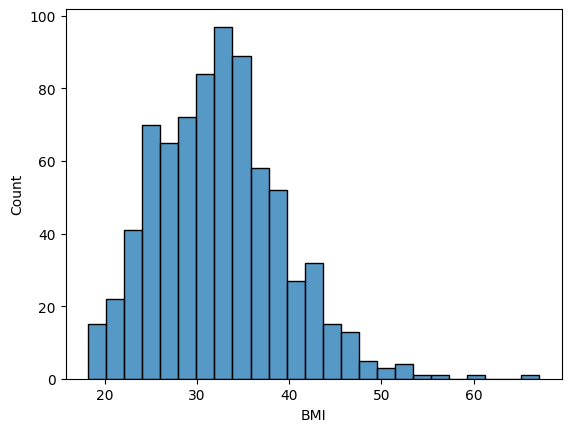

In [201]:
sns.histplot(x = "BMI", data=df)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

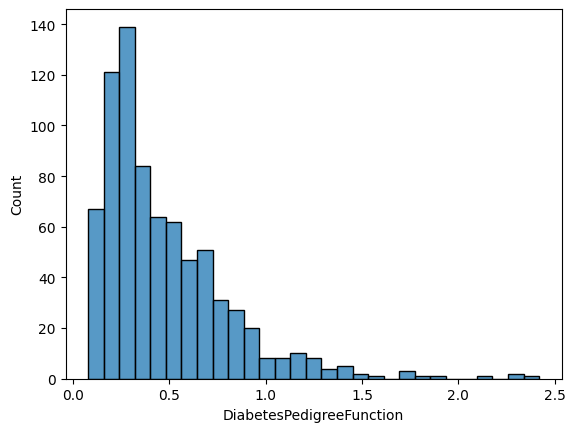

In [202]:
sns.histplot(x = "DiabetesPedigreeFunction", data=df)

<Axes: xlabel='Age', ylabel='Count'>

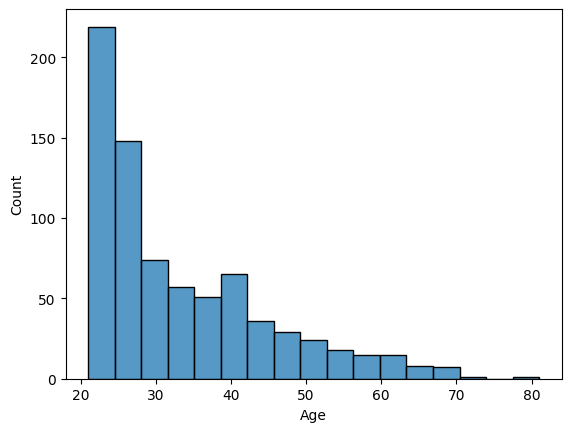

In [203]:
sns.histplot(x = "Age", data=df)

<Axes: xlabel='Outcome', ylabel='Count'>

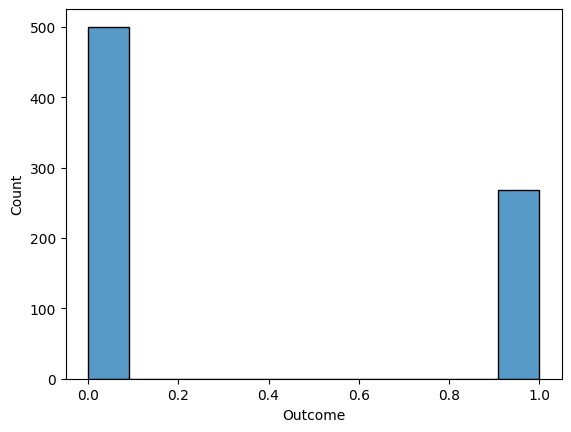

In [204]:
sns.histplot(x = "Outcome", data=df)